#### Food Inspection Data Set Description
"The Health Division of the Department of Inspectional Services ensures that all food establishments in the City of Boston meet relevant sanitary codes and standards. Businesses that serve food are inspected at least once a year, and follow-up inspections are performed on high risk establishments. Health inspections are also conducted in response to complaints of unsanitary conditions or illness."  *(Source - https://data.boston.gov)*

The number of violations is defined as:

1) *      Minor Violation 

2) **     Major Violation 

3) ***    Severe Violation

*(Source - https://restaurantprediction.weebly.com)*


#### Data Cleaning Summary
1) Convert attributes to appropriate date type and format
    
    a) all -dttm columns (5) to datetime 
    
    b) zip to 5-digit format
    
2) Filter data by active license category

3) Filter data by license expired by 12/31/19

4) Filter data for inspection result ('resultdttm') for dates from 2015 to current (to match df_crime)

5) Remove un-needed columns

6) Take care of NaN values 

#### Final Clean Data Set Information

1) Name = dfins_activefrm15

2) Shape = 164,383 rows x 13 columns

## Installing Packages

In [337]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_columns', None)  # display all columns on screen
import re
import matplotlib.pyplot as plt

## Original Dataset Exploration

In [2]:
df_ins_org = pd.read_csv(r'C:\Users\ale\Desktop\MIST6150\Project\df_ins.csv')

C:\Users\ale\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_ins_org.head()

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2019-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,15-4-202.16,*,Non-Food Contact Surfaces,2013-02-15 12:19:42,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2019-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2019-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2019-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,29-5-201/02.11,*,Installed and Maintained,2013-02-15 12:19:42,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2019-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,31-5-204/05.11,***,Location Accessible,2013-02-15 12:19:42,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"


In [4]:
df_ins_org.shape

(562720, 26)

In [195]:
df_ins_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562720 entries, 0 to 562719
Data columns (total 26 columns):
businessname    562720 non-null object
dbaname         5426 non-null object
legalowner      392419 non-null object
namelast        562720 non-null object
namefirst       562606 non-null object
licenseno       562720 non-null int64
issdttm         562720 non-null object
expdttm         562720 non-null object
licstatus       562720 non-null object
licensecat      562720 non-null object
descript        562720 non-null object
result          562720 non-null object
resultdttm      562720 non-null object
violation       530897 non-null object
viollevel       530897 non-null object
violdesc        530896 non-null object
violdttm        562720 non-null object
violstatus      530897 non-null object
statusdate      233765 non-null object
comments        562716 non-null object
address         562720 non-null object
city            562694 non-null object
state           562720 non-null ob

## Cleaning 1 - Converting Data Type

In [5]:
# copy df_ins_org as df_ins.  
df_ins = df_ins_org.copy()

In [6]:
# change data type of "issdttm", "expdttm", "resultdttm", "violdttm", and "statusdate" to date/time 
df_ins['issdttm']=pd.to_datetime(df_ins['issdttm'], format='%Y-%m-%d', errors='coerce')
df_ins['expdttm']=pd.to_datetime(df_ins['expdttm'], format='%Y-%m-%d', errors = 'coerce')
df_ins['resultdttm']=pd.to_datetime(df_ins['resultdttm'], format='%Y-%m-%d', errors = 'coerce')
df_ins['violdttm']=pd.to_datetime(df_ins['violdttm'], format='%Y-%m-%d', errors = 'coerce')
df_ins['statusdate']=pd.to_datetime(df_ins['statusdate'], format='%Y-%m-%d', errors = 'coerce')

In [7]:
# change zip to correct 5-digit format
df_ins['zip']=df_ins['zip'].astype(str).str.zfill(5)

In [8]:
# confirm data type change for df_ins
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562720 entries, 0 to 562719
Data columns (total 26 columns):
businessname    562720 non-null object
dbaname         5426 non-null object
legalowner      392419 non-null object
namelast        562720 non-null object
namefirst       562606 non-null object
licenseno       562720 non-null int64
issdttm         562607 non-null datetime64[ns]
expdttm         562449 non-null datetime64[ns]
licstatus       562720 non-null object
licensecat      562720 non-null object
descript        562720 non-null object
result          562720 non-null object
resultdttm      556323 non-null datetime64[ns]
violation       530897 non-null object
viollevel       530897 non-null object
violdesc        530896 non-null object
violdttm        530894 non-null datetime64[ns]
violstatus      530897 non-null object
statusdate      233765 non-null datetime64[ns]
comments        562716 non-null object
address         562720 non-null object
city            562694 non-null o

## Cleaning 2 - Filtering Dataset to Desired Time Range

In [9]:
# filter by license status = active
df_ins=df_ins[df_ins['licstatus']=='Active']
df_ins.shape

(355029, 26)

In [10]:
# filter by license expirate date >= 12/31/2019
df_ins=df_ins[df_ins['expdttm']>='2019']
df_ins.shape

(342409, 26)

In [11]:
# filter by resultdttm=>2015 (to match with df_crime)
df_ins=df_ins[df_ins['resultdttm']>='2015']
df_ins.shape

(164383, 26)

## Cleaning 4 - Dropping Columns

In [261]:
# copy df_ins as dfins_activefrm15
dfins_activefrm15 = df_ins.copy()

In [262]:
# dropping columnns that are (1) not necessary for analysis and (2) already filted to one constant value
cols_to_drop=['dbaname','legalowner','namelast','namefirst','state','licenseno','expdttm','licstatus','result','violdttm','statusdate','address','property_id']
dfins_activefrm15 = dfins_activefrm15.drop(cols_to_drop,axis = 1) 
dfins_activefrm15.shape # expect 26-13 = 13 columns remaining

(164383, 13)

In [263]:
dfins_activefrm15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164383 entries, 16 to 562719
Data columns (total 13 columns):
businessname    164383 non-null object
issdttm         164383 non-null datetime64[ns]
licensecat      164383 non-null object
descript        164383 non-null object
resultdttm      164383 non-null datetime64[ns]
violation       158686 non-null object
viollevel       158686 non-null object
violdesc        158686 non-null object
violstatus      158686 non-null object
comments        164383 non-null object
city            164383 non-null object
zip             164383 non-null object
location        121472 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 17.6+ MB


## Cleaning 5 - Checking Null Data / Filling NaN Rows

In [264]:
# check for null data
dfins_activefrm15.isnull().sum()

businessname        0
issdttm             0
licensecat          0
descript            0
resultdttm          0
violation        5697
viollevel        5697
violdesc         5697
violstatus       5697
comments            0
city                0
zip                 0
location        42911
dtype: int64

### 5a - Filling NaN for Zip Code

In [265]:
# zip is the attribute with most null rows
# location can be retrieved from zip code
# sort df by zip code and location. Plan is to fill null location with the previous valid value for same zip.
dfins_activefrm15 = dfins_activefrm15.sort_values(['zip','location'],ascending=False)
dfins_activefrm15.head()

,businessname,issdttm,licensecat,descript,resultdttm,violation,viollevel,violdesc,violstatus,comments,city,zip,location
157190,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2015-11-05 11:09:52,M-2-103.11,***,PIC Performing Duties,Fail,There was a blockage in the sewer line two day...,Brighton,02467,"(42.335750000, -71.149910000)"
157191,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2017-04-10 11:31:38,08-3-305-307.11,*,Food Protection,Fail,remove al non ice related materials from stora...,Brighton,02467,"(42.335750000, -71.149910000)"
157192,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2017-04-10 11:31:38,14-4-202.11,*,Food Contact Surfaces Design,Fail,at the sandwich station replace scoured and ...,Brighton,02467,"(42.335750000, -71.149910000)"
157193,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2017-04-10 11:31:38,21-3-304.14,*,Wiping Cloths Clean Sanitize,Fail,keep all in use wiping cloths in a sanitizing ...,Brighton,02467,"(42.335750000, -71.149910000)"
157194,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2017-04-10 11:31:38,29-5-201/02.11,*,Installed and Maintained,Fail,repair hot water knob to the hand sink inn the...,Brighton,02467,"(42.335750000, -71.149910000)"


In [266]:
# unique zips with null location
dfins_activefrm15.zip[dfins_activefrm15.location.isnull()].unique()

array(['02467', '02215', '02210', '02201', '02199', '02163', '02148',
       '02136', '02135', '02134', '02132', '02131', '02130', '02129',
       '02128', '02127', '02126', '02125', '02124', '02122', '02121',
       '02120', '02119', '02118', '02116', '02115', '02114', '02113',
       '02111', '02110', '02109', '02108', '0000 '], dtype=object)

In [267]:
# check a random zip with missing location
dfins_activefrm15[dfins_activefrm15.zip=='02124'][['zip','location','city']]

,zip,location,city
465683,02124,"(42.315678000, -71.065941000)",Dorchester
465684,02124,"(42.315678000, -71.065941000)",Dorchester
465685,02124,"(42.315678000, -71.065941000)",Dorchester
465686,02124,"(42.315678000, -71.065941000)",Dorchester
465691,02124,"(42.315678000, -71.065941000)",Dorchester
465692,02124,"(42.315678000, -71.065941000)",Dorchester
465693,02124,"(42.315678000, -71.065941000)",Dorchester
465694,02124,"(42.315678000, -71.065941000)",Dorchester
465702,02124,"(42.315678000, -71.065941000)",Dorchester
465703,02124,"(42.315678000, -71.065941000)",Dorchester


In [268]:
# fill null location value with previous valid location of the same zip
dfins_activefrm15['location'] = dfins_activefrm15['location'].fillna(method='ffill')

In [269]:
# confirm change to zip by re-checking the "random" zip
dfins_activefrm15[dfins_activefrm15.zip=='02124'][['zip','location','city']]

,zip,location,city
465683,02124,"(42.315678000, -71.065941000)",Dorchester
465684,02124,"(42.315678000, -71.065941000)",Dorchester
465685,02124,"(42.315678000, -71.065941000)",Dorchester
465686,02124,"(42.315678000, -71.065941000)",Dorchester
465691,02124,"(42.315678000, -71.065941000)",Dorchester
465692,02124,"(42.315678000, -71.065941000)",Dorchester
465693,02124,"(42.315678000, -71.065941000)",Dorchester
465694,02124,"(42.315678000, -71.065941000)",Dorchester
465702,02124,"(42.315678000, -71.065941000)",Dorchester
465703,02124,"(42.315678000, -71.065941000)",Dorchester


### 5b - Filling NaN for Violation Status, Description, and Level

In [270]:
# Reviewing "violstatus" column
dfins_activefrm15['violstatus'].unique()

array(['Fail', 'Pass', nan], dtype=object)

In [271]:
# "Violstatus" Pass indicates Reinspection was Passed, nan or null indicates original Inspection was Passed
# Recode "Pass" to "Reinspection Pass", "Fail" to "Fail - Reinspection Needed", and null to "Pass"
dfins_activefrm15['violstatus'] = dfins_activefrm15['violstatus'].replace("Pass","Reinspection Pass")
dfins_activefrm15['violstatus'] = dfins_activefrm15['violstatus'].replace("Fail","Fail - Reinspection Needed")
dfins_activefrm15['violstatus'] = dfins_activefrm15['violstatus'].fillna('Pass')

In [272]:
# null in "violation", "violdesc", and "viollevel" indicates that original inpsection was passed
# change null for "violation" and "violdesc" to "Pass"
dfins_activefrm15['violation'] = dfins_activefrm15['violation'].fillna('Pass')
dfins_activefrm15['violdesc'] = dfins_activefrm15['violdesc'].fillna('Pass')

In [273]:
# change null for "viollevel" to 0, which is equivalent to Pass
dfins_activefrm15['viollevel'] = dfins_activefrm15['viollevel'].fillna('0')

### 5c - Confirming df no longer has NaN 

In [ ]:
# confirm no null data remaining
print('Any null values in dfins_activefrm15? ', dfins_activefrm15.isnull().values.any())

In [275]:
dfins_activefrm15.describe(include='all')

,businessname,issdttm,licensecat,descript,resultdttm,violation,viollevel,violdesc,violstatus,comments,city,zip,location
count,164383,164383,164383,164383,164383,164383,164383,164383,164383,164383,164383,164383,164383
unique,3283,3628,4,4,34767,91,4,89,3,73776,45,36,1971
top,Dunkin Donuts,2015-06-30 08:46:46,FS,Eating & Drinking,2018-11-15 07:53:49,23-4-602.13,*,Non-Food Contact Surfaces Clean,Fail - Reinspection Needed,,Boston,02116,"(42.359198000, -71.027191000)"
freq,897,415,83376,83376,50,12635,118735,12635,87204,7114,64733,16089,5080
first,NaN,2011-11-02 14:01:20,NaN,NaN,2015-01-02 10:07:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-03-07 10:40:45,NaN,NaN,2019-03-08 13:54:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6 - Further Data Inspection and Cleaning

In [276]:
# change "viollevel" from * to 1 and ** to 2 and *** to 3
dfins_activefrm15['viollevel'] = dfins_activefrm15['viollevel'].replace("*","1")
dfins_activefrm15['viollevel'] = dfins_activefrm15['viollevel'].replace("**","2")
dfins_activefrm15['viollevel'] = dfins_activefrm15['viollevel'].replace("***","3")

In [277]:
# change "viollevel" data type from object to integer
dfins_activefrm15['viollevel'] = dfins_activefrm15.viollevel.astype(int)

In [278]:
# check "city" data
print(dfins_activefrm15.city.unique())

['Brighton' 'Chestnut Hill' 'WEST ROXBURY' 'CHESTNUT HILL' 'Boston'
 'Allston' 'BOSTON' 'Fenway' 'South Boston' 'SOUTH BOSTON' 'East Boston'
 'Jamaica Plain' 'Mattapan' 'Hyde Park' 'HYDE PARK' 'MATTAPAN' 'Brighton/'
 'BRIGHTON' 'ALLSTON' 'West Roxbury' 'Roslindale' 'West Roxbury//'
 'ROSLINDALE' 'Roslindale/' 'Mission Hill' 'Roxbury' 'JAMAICA PLAIN'
 'Charlestown' 'Charlestown/' 'CHARLESTOWN' 'EAST BOSTON' 'East Boston/'
 'Dorchester' 'South Boston/' 'Mattapan/' 'DORCHESTER' 'ROXBURY'
 'Mission Hill/' 'South End' 'South End/' 'Back Bay/' 'Fenway/'
 'Downtown/Financial District' 'Financial District' ' ']


In [279]:
# change string format for city to prevent duplicates
dfins_activefrm15['city'] = dfins_activefrm15['city'].str.replace('/', '')
dfins_activefrm15['city'] = dfins_activefrm15['city'].str.upper()

In [280]:
print(dfins_activefrm15.city.unique())

['BRIGHTON' 'CHESTNUT HILL' 'WEST ROXBURY' 'BOSTON' 'ALLSTON' 'FENWAY'
 'SOUTH BOSTON' 'EAST BOSTON' 'JAMAICA PLAIN' 'MATTAPAN' 'HYDE PARK'
 'ROSLINDALE' 'MISSION HILL' 'ROXBURY' 'CHARLESTOWN' 'DORCHESTER'
 'SOUTH END' 'BACK BAY' 'DOWNTOWNFINANCIAL DISTRICT' 'FINANCIAL DISTRICT'
 ' ']


In [281]:
# as city is not really city, but Boston Neighborhood.  Change column heading "city" to 'neigborhood'
dfins_activefrm15.rename(columns={'city':'neighborhood'},inplace=True)

In [282]:
# change "DowntownFinancial Disctrict" to "Financial District"
dfins_activefrm15['neighborhood'] = dfins_activefrm15['neighborhood'].replace('DOWNTOWNFINANCIAL DISTRICT','FINANCIAL DISTRICT')

In [283]:
# check out " " (blank) neighborhood
dfins_activefrm15[dfins_activefrm15['neighborhood']==' ']

,businessname,issdttm,licensecat,descript,resultdttm,violation,viollevel,violdesc,violstatus,comments,neighborhood,zip,location
203955,Frog Pond Boston @ Boston Common,2012-02-24 14:04:35,FT,Eating & Drinking w/ Take Out,2015-06-30 11:39:06,23-4-602.13,1,Non-Food Contact Surfaces Clean,Fail - Reinspection Needed,clean drain compartments to fryers. Clean inte...,,0000,"(42.355214000, -71.061622000)"
203956,Frog Pond Boston @ Boston Common,2012-02-24 14:04:35,FT,Eating & Drinking w/ Take Out,2018-06-29 10:17:36,23-4-602.13,1,Non-Food Contact Surfaces Clean,Fail - Reinspection Needed,Clean to remove ice build up from dippin dots ...,,0000,"(42.355214000, -71.061622000)"
203969,Frog Pond Boston @ Boston Common,2012-02-24 14:04:35,FT,Eating & Drinking w/ Take Out,2016-12-02 12:42:09,Pass,0,Pass,Pass,,,0000,"(42.355214000, -71.061622000)"
203970,Frog Pond Boston @ Boston Common,2012-02-24 14:04:35,FT,Eating & Drinking w/ Take Out,2017-07-14 12:50:14,Pass,0,Pass,Pass,,,0000,"(42.355214000, -71.061622000)"


In [284]:
# blank neighborhood is Frog Pond Mobile Walk-On food establishment
# zip code for Frog Pond, Boston Common is 02108
# check zip 02108 in DF
dfins_activefrm15[dfins_activefrm15['zip']=='02108']

,businessname,issdttm,licensecat,descript,resultdttm,violation,viollevel,violdesc,violstatus,comments,neighborhood,zip,location
507329,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,02-3-602.11-.12/3-302.12,1,Food Container Labels,Fail - Reinspection Needed,Label where needed,BOSTON,02108,"(42.361680000, -71.057040000)"
507330,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,05-4-302.12,1,Food Thermometers Provided,Fail - Reinspection Needed,Provide a working food thermometer,BOSTON,02108,"(42.361680000, -71.057040000)"
507331,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,08-3-305-307.11,1,Food Protection,Fail - Reinspection Needed,Store all raw shell eggs and poultry under rea...,BOSTON,02108,"(42.361680000, -71.057040000)"
507332,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,10-3-304.12,1,Food Utensil Storage,Fail - Reinspection Needed,Remove knives from being stored in between so...,BOSTON,02108,"(42.361680000, -71.057040000)"
507333,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,15-4-202.16,1,Non-Food Contact Surfaces,Fail - Reinspection Needed,Resurface grease trap,BOSTON,02108,"(42.361680000, -71.057040000)"
507334,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,16-4-301.12,1,Three Compartment Sink,Fail - Reinspection Needed,Provide three plugs for the sink,BOSTON,02108,"(42.361680000, -71.057040000)"
507335,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,17-4-302.14,1,Test Kit Provided,Fail - Reinspection Needed,Provide chlorine test strips as discussed,BOSTON,02108,"(42.361680000, -71.057040000)"
507336,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,20-4-703.11,3,Food Contact Surfaces Clean,Fail - Reinspection Needed,Clean surfaces of all in use cutting boards fr...,BOSTON,02108,"(42.361680000, -71.057040000)"
507337,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,21-3-304.14,1,Wiping Cloths Clean Sanitize,Fail - Reinspection Needed,Set up as discussed,BOSTON,02108,"(42.361680000, -71.057040000)"
507338,THE POINT,2011-12-22 11:51:51,FS,Eating & Drinking,2015-06-18 11:04:32,23-4-602.13,1,Non-Food Contact Surfaces Clean,Fail - Reinspection Needed,Clean inside / outside of all refrigeration un...,BOSTON,02108,"(42.361680000, -71.057040000)"


In [287]:
# change data with zip "0000 " to Boston neighborhood, 02108 zip 
dfins_activefrm15.loc[dfins_activefrm15.zip == '0000 ', 'neighborhood']='BOSTON'   
dfins_activefrm15['zip']=dfins_activefrm15['zip'].replace('0000 ','02108')

In [288]:
# confirm changes to "0000 " zip
dfins_activefrm15[dfins_activefrm15['businessname']=='Frog Pond Boston @ Boston Common']

,businessname,issdttm,licensecat,descript,resultdttm,violation,viollevel,violdesc,violstatus,comments,neighborhood,zip,location
203955,Frog Pond Boston @ Boston Common,2012-02-24 14:04:35,FT,Eating & Drinking w/ Take Out,2015-06-30 11:39:06,23-4-602.13,1,Non-Food Contact Surfaces Clean,Fail - Reinspection Needed,clean drain compartments to fryers. Clean inte...,BOSTON,02108,"(42.355214000, -71.061622000)"
203956,Frog Pond Boston @ Boston Common,2012-02-24 14:04:35,FT,Eating & Drinking w/ Take Out,2018-06-29 10:17:36,23-4-602.13,1,Non-Food Contact Surfaces Clean,Fail - Reinspection Needed,Clean to remove ice build up from dippin dots ...,BOSTON,02108,"(42.355214000, -71.061622000)"
203969,Frog Pond Boston @ Boston Common,2012-02-24 14:04:35,FT,Eating & Drinking w/ Take Out,2016-12-02 12:42:09,Pass,0,Pass,Pass,,BOSTON,02108,"(42.355214000, -71.061622000)"
203970,Frog Pond Boston @ Boston Common,2012-02-24 14:04:35,FT,Eating & Drinking w/ Take Out,2017-07-14 12:50:14,Pass,0,Pass,Pass,,BOSTON,02108,"(42.355214000, -71.061622000)"


In [290]:
# confirm changes to neighborhood
dfins_activefrm15.neighborhood.unique()

array(['BRIGHTON', 'CHESTNUT HILL', 'WEST ROXBURY', 'BOSTON', 'ALLSTON',
       'FENWAY', 'SOUTH BOSTON', 'EAST BOSTON', 'JAMAICA PLAIN',
       'MATTAPAN', 'HYDE PARK', 'ROSLINDALE', 'MISSION HILL', 'ROXBURY',
       'CHARLESTOWN', 'DORCHESTER', 'SOUTH END', 'BACK BAY',
       'FINANCIAL DISTRICT'], dtype=object)

In [291]:
# confirm '0000 ' is no longer part of zip
dfins_activefrm15.zip.unique()

array(['02467', '02215', '02210', '02203', '02201', '02199', '02163',
       '02148', '02140', '02136', '02135', '02134', '02132', '02131',
       '02130', '02129', '02128', '02127', '02126', '02125', '02124',
       '02122', '02121', '02120', '02119', '02118', '02117', '02116',
       '02115', '02114', '02113', '02111', '02110', '02109', '02108'],
      dtype=object)

In [383]:
# extract year from resultdttm which is in datetime64 format
dfins_activefrm15['resultyr']=pd.DatetimeIndex(dfins_activefrm15['resultdttm']).year

In [384]:
# confirm resultyr column
dfins_activefrm15.head()

,businessname,issdttm,licensecat,descript,resultdttm,violation,viollevel,violdesc,violstatus,comments,neighborhood,zip,location,resultyr
157190,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2015-11-05 11:09:52,M-2-103.11,3,PIC Performing Duties,Fail - Reinspection Needed,There was a blockage in the sewer line two day...,BRIGHTON,02467,"(42.335750000, -71.149910000)",2015
157191,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2017-04-10 11:31:38,08-3-305-307.11,1,Food Protection,Fail - Reinspection Needed,remove al non ice related materials from stora...,BRIGHTON,02467,"(42.335750000, -71.149910000)",2017
157192,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2017-04-10 11:31:38,14-4-202.11,1,Food Contact Surfaces Design,Fail - Reinspection Needed,at the sandwich station replace scoured and ...,BRIGHTON,02467,"(42.335750000, -71.149910000)",2017
157193,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2017-04-10 11:31:38,21-3-304.14,1,Wiping Cloths Clean Sanitize,Fail - Reinspection Needed,keep all in use wiping cloths in a sanitizing ...,BRIGHTON,02467,"(42.335750000, -71.149910000)",2017
157194,Dunkin Donuts,2014-12-02 12:12:40,FT,Eating & Drinking w/ Take Out,2017-04-10 11:31:38,29-5-201/02.11,1,Installed and Maintained,Fail - Reinspection Needed,repair hot water knob to the hand sink inn the...,BRIGHTON,02467,"(42.335750000, -71.149910000)",2017


In [16]:
# check licensecat unique values
df_ins['licensecat'].unique()

array(['FS', 'FT', 'RF', 'MFW'], dtype=object)

In [17]:
# check descript unique values
# this is the description for licence category
df_ins['descript'].unique()

array(['Eating & Drinking', 'Eating & Drinking w/ Take Out',
       'Retail Food', 'Mobile Food Walk On'], dtype=object)

## 7 - Write Dataset to csv

In [411]:
dfins_activefrm15.to_csv(r'C:\Users\ale\Desktop\MIST6150\Project\df_foodins_clean.csv')

## 8 - EDA

In [408]:
food_type=dfins_activefrm15.groupby('licensecat').businessname.count().sort_values(ascending=False)
print(food_type)

licensecat
FS     83376
FT     60609
RF     18140
MFW     2258
Name: businessname, dtype: int64


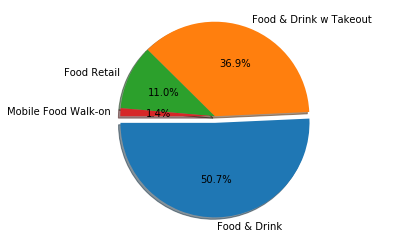

In [409]:
plt.pie(food_type,labels=['Food & Drink','Food & Drink w Takeout','Food Retail','Mobile Food Walk-on'],shadow=True,explode=(0.07,0,0,0),startangle=180,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [431]:
viol_by_year=pd.DataFrame(dfins_activefrm15.groupby(['violstatus','resultyr']).businessname.count())
print(viol_by_year)

                                     businessname
violstatus                 resultyr              
Fail - Reinspection Needed 2015             17642
                           2016             21864
                           2017             18402
                           2018             24888
                           2019              4408
Pass                       2015              1126
                           2016              1190
                           2017              1622
                           2018              1495
                           2019               264
Reinspection Pass          2015             14091
                           2016             17823
                           2017             15261
                           2018             20648
                           2019              3659


In [426]:
viol_by_year.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15 entries, (Fail - Reinspection Needed, 2015) to (Reinspection Pass, 2019)
Data columns (total 1 columns):
businessname    15 non-null int64
dtypes: int64(1)
memory usage: 330.0+ bytes


In [439]:
# ave. violation level by year
# 2019 respresents inspection through mid March 2019
viol_by_yr = dfins_activefrm15.groupby('resultyr').viollevel.mean()
print(viol_by_yr)

resultyr
2015    1.377157
2016    1.385131
2017    1.366586
2018    1.416831
2019    1.400792
Name: viollevel, dtype: float64


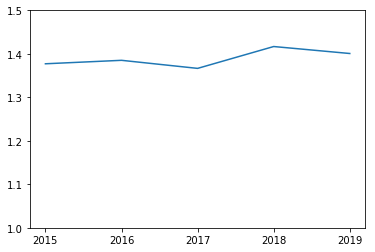

In [453]:
plt.plot(viol_by_yr)
plt.xticks([2015,2016,2017,2018,2019])
plt.ylim(1,1.5)
plt.show()

In [465]:
viol_by_yr = pd.DataFrame(dfins_activefrm15.groupby('neighborhood').viollevel.mean().sort_values(ascending=False))
print(viol_by_yr)

                    viollevel
neighborhood                 
CHARLESTOWN          1.523282
BOSTON               1.435793
ALLSTON              1.419425
SOUTH BOSTON         1.384538
DORCHESTER           1.380510
HYDE PARK            1.377735
EAST BOSTON          1.368466
MATTAPAN             1.363929
BRIGHTON             1.352547
ROXBURY              1.352369
SOUTH END            1.336842
ROSLINDALE           1.304566
JAMAICA PLAIN        1.278193
MISSION HILL         1.259109
BACK BAY             1.250000
WEST ROXBURY         1.195455
FENWAY               1.113636
CHESTNUT HILL        1.000000
FINANCIAL DISTRICT   0.000000


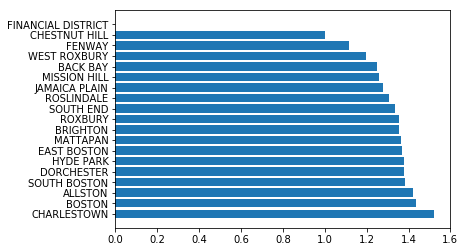

In [478]:
plt.barh(viol_by_yr.index,viol_by_yr.viollevel)
plt.show()

In [502]:
viol_by_biz = dfins_activefrm15.groupby(['businessname','neighborhood','licensecat']).viollevel.mean().sort_values(ascending=False)
viol_by_biz.head(25)                       

businessname                      neighborhood  licensecat
Liuyishon Hotpot Boston           BOSTON        FS            3.000000
Mai Cuisine                       ALLSTON       RF            3.000000
Limelight Stage & Studios         BOSTON        FS            3.000000
Courtyard Boston Downtown Market  BOSTON        RF            3.000000
The Gift Shop @ ISBCC             ROXBURY       RF            2.583333
Bartleby's Seitan Stand           BOSTON        MFW           2.562500
Hot & Spicy                       EAST BOSTON   RF            2.400000
Savory Truck                      BOSTON        MFW           2.387097
Delight Corner                    BOSTON        RF            2.370370
The Spaht                         BOSTON        MFW           2.333333
Bon Appetit Creperie              BOSTON        FT            2.333333
Rebecca's Cafe @ Reggie Lewis     MISSION HILL  FT            2.333333
Market Cafe                       BOSTON        FS            2.333333
The One Sushi Inc.